#                         Real Estate Data Analysis
Data Source: KC House Data CSV file

Data Relevancy: The dataset contains columns such as Price, Condition, Grade which contribute to how inefficient real estate                     system contributes to poor classification

The dataset needs cleaning before analysis is made.

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# fetching the dataset
house = pd.read_csv("kc_house_data.csv")
house.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [3]:
house.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [4]:
# checking the shape
house.shape

(21597, 21)

In [5]:
# checking the dataset info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# checking concise summary stats
house.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


In [7]:
# describing categorical features
house.describe(include="O")

,date,waterfront,view,condition,grade,sqft_basement
count,21597,19221,21534,21597,21597,21597
unique,372,2,5,5,11,304
top,6/23/2014,NO,NONE,Average,7 Average,0.0
freq,142,19075,19422,14020,8974,12826


In [8]:
# creating a copy before cleaning data
house1 = house.copy(deep=True)
house1.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [9]:
# drop id column
house1.drop('id', axis=1, inplace=True)

In [10]:
# checking unique variable
for h in house1:
  colval = house1[h].unique()
  print(f"Column name: {h} \n : {colval}")

Column name: date 
 : ['10/13/2014' '12/9/2014' '2/25/2015' '2/18/2015' '5/12/2014' '6/27/2014'
 '1/15/2015' '4/15/2015' '3/12/2015' '4/3/2015' '5/27/2014' '5/28/2014'
 '10/7/2014' '1/24/2015' '7/31/2014' '5/29/2014' '12/5/2014' '4/24/2015'
 '5/14/2014' '8/26/2014' '7/3/2014' '5/16/2014' '11/20/2014' '11/3/2014'
 '6/26/2014' '12/1/2014' '6/24/2014' '3/2/2015' '11/10/2014' '12/3/2014'
 '6/13/2014' '12/30/2014' '2/13/2015' '6/20/2014' '7/15/2014' '8/11/2014'
 '7/7/2014' '10/28/2014' '7/29/2014' '7/18/2014' '3/25/2015' '7/16/2014'
 '4/28/2015' '3/11/2015' '9/16/2014' '2/17/2015' '12/31/2014' '2/5/2015'
 '3/3/2015' '8/19/2014' '4/7/2015' '8/27/2014' '2/23/2015' '12/10/2014'
 '8/28/2014' '10/21/2014' '12/7/2014' '6/3/2014' '9/9/2014' '10/9/2014'
 '8/25/2014' '6/12/2014' '9/12/2014' '1/5/2015' '6/10/2014' '7/10/2014'
 '3/16/2015' '11/5/2014' '4/20/2015' '6/9/2014' '3/23/2015' '12/2/2014'
 '12/22/2014' '1/28/2015' '6/2/2014' '11/14/2014' '6/18/2014' '5/19/2014'
 '9/4/2014' '5/22/2014' '2/26/2

In [11]:
# checking columns
house1.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
# replacing ? with NaN in sqft_basement
house1['sqft_basement'] = house1['sqft_basement'].replace("?", np.nan)

In [13]:
# converting sqft_basement into numeric
house1['sqft_basement'] = pd.to_numeric(house1['sqft_basement'])

In [14]:
# checking missing values
house1.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [15]:
# filling in missing values
house1.fillna({'view': house1['view'].mode()[0]},inplace=True)
house1.fillna({'waterfront' : house1['waterfront'].mode()[0]}, inplace=True)
house1.fillna({'yr_renovated' : 0}, inplace=True)
house1.fillna({'sqft_basement' : house1['sqft_basement'].median()}, inplace=True)

In [16]:
# check missing values again
house1.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
# changing column info again
house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [18]:
# changing them into their right datatypes
house1 = house1.astype({'floors' : int, 'bathrooms' : int, 'yr_renovated': int, 'sqft_basement' : int, 'price' : int})
house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  int64  
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  int64  
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  int64  
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [19]:
# converting date into the correct datatype
house1['date'] = pd.to_datetime(house1['date'])
house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  int64         
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  int64         
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  int64         
 7   waterfront     21597 non-null  object        
 8   view           21597 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [20]:
house1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1,1180,5650,1,NO,NONE,Average,7 Average,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000,3,2,2570,7242,2,NO,NONE,Average,7 Average,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000,2,1,770,10000,1,NO,NONE,Average,6 Low Average,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000,4,3,1960,5000,1,NO,NONE,Very Good,7 Average,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000,3,2,1680,8080,1,NO,NONE,Average,8 Good,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000,3,2,1530,1131,3,NO,NONE,Average,8 Good,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2015-02-23,400000,4,2,2310,5813,2,NO,NONE,Average,8 Good,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,2014-06-23,402101,2,0,1020,1350,2,NO,NONE,Average,7 Average,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,2015-01-16,400000,3,2,1600,2388,2,NO,NONE,Average,8 Good,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [21]:
# checking for duplicates
house1.duplicated().sum()

np.int64(0)

<Axes: ylabel='price'>

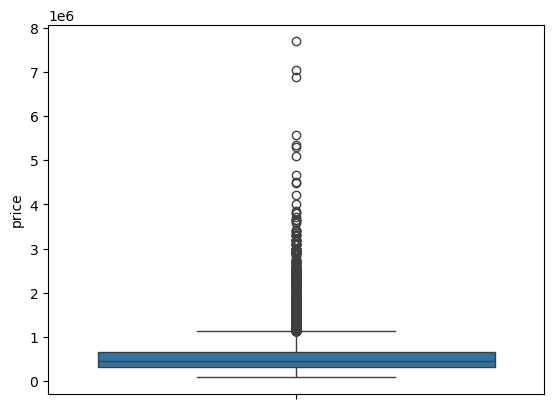

In [22]:
# checking for outliers
sns.boxplot(house1['price'])

<Axes: ylabel='bathrooms'>

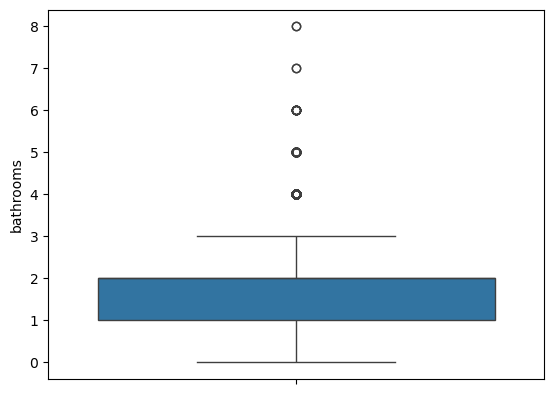

In [23]:
sns.boxplot(house1['bathrooms'])

<Axes: ylabel='bedrooms'>

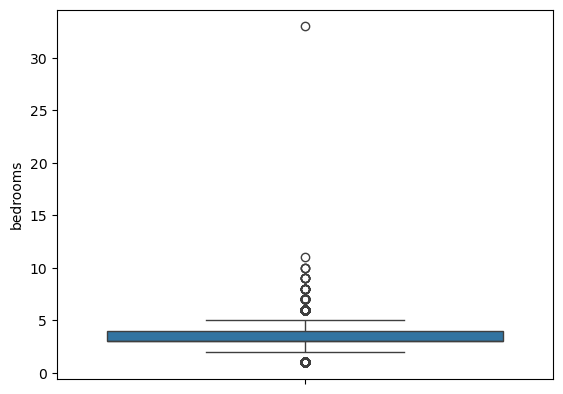

In [24]:
sns.boxplot(house1['bedrooms'])

<Axes: ylabel='floors'>

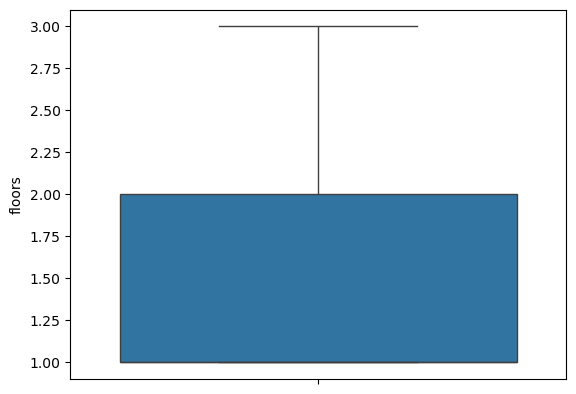

In [25]:
sns.boxplot(house1['floors'])

In [26]:
house1.sample()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9933,2014-09-02,749500,4,2,2490,3840,1,NO,NONE,Good,7 Average,1610,880,1922,0,98103,47.6551,-122.344,1420,4000


<Axes: ylabel='sqft_living'>

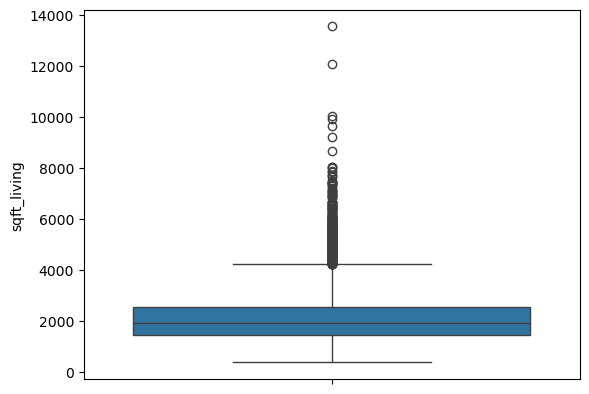

In [27]:
sns.boxplot(house1['sqft_living'])

<Axes: ylabel='sqft_above'>

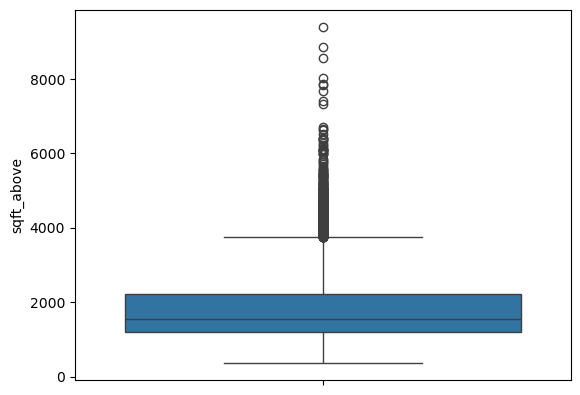

In [28]:
sns.boxplot(house1['sqft_above'])

<Axes: ylabel='sqft_lot'>

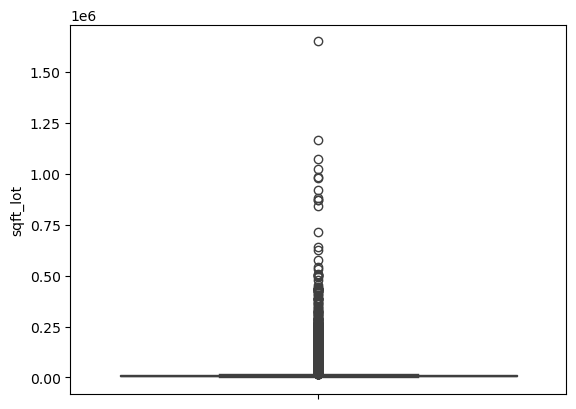

In [29]:
sns.boxplot(house1['sqft_lot'])

<Axes: ylabel='sqft_living15'>

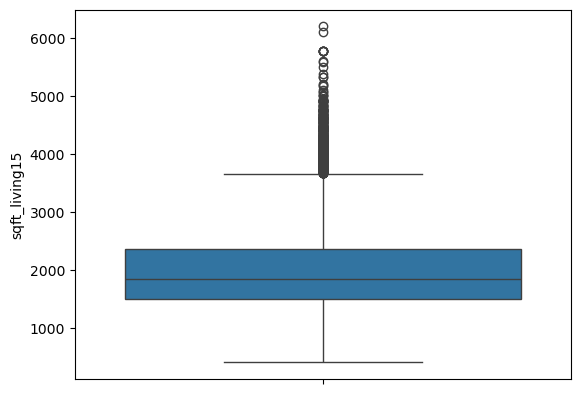

In [30]:
sns.boxplot(house1['sqft_living15'])

<Axes: ylabel='yr_built'>

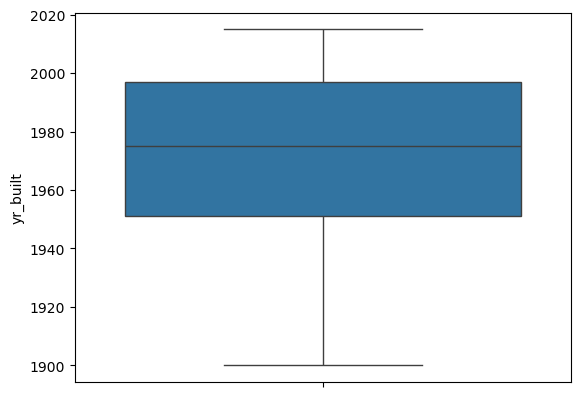

In [31]:
sns.boxplot(house1['yr_built'])

<Axes: ylabel='yr_renovated'>

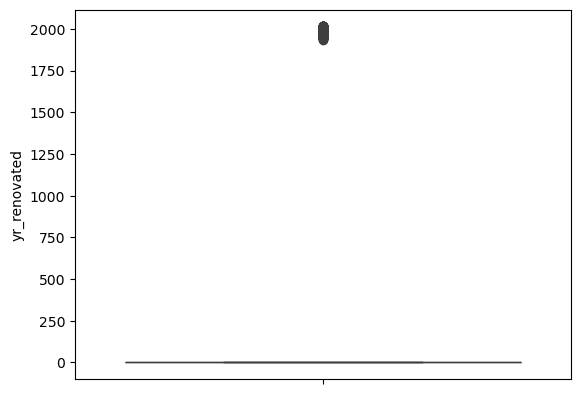

In [32]:
sns.boxplot(house1['yr_renovated'])

<Axes: ylabel='sqft_lot15'>

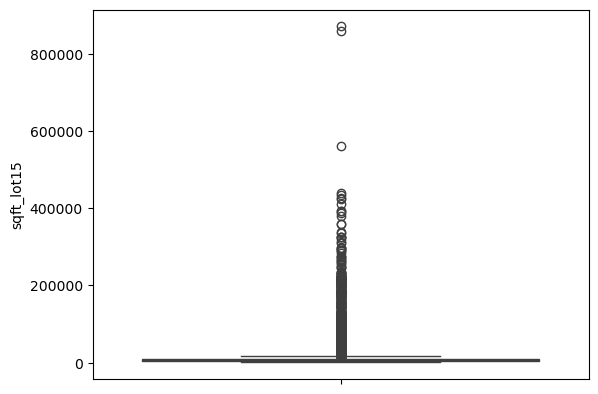

In [33]:
sns.boxplot(house1['sqft_lot15'])


<Axes: ylabel='sqft_basement'>

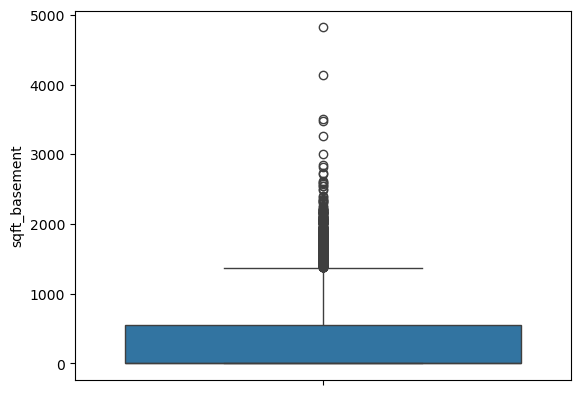

In [34]:
sns.boxplot(house1['sqft_basement'])

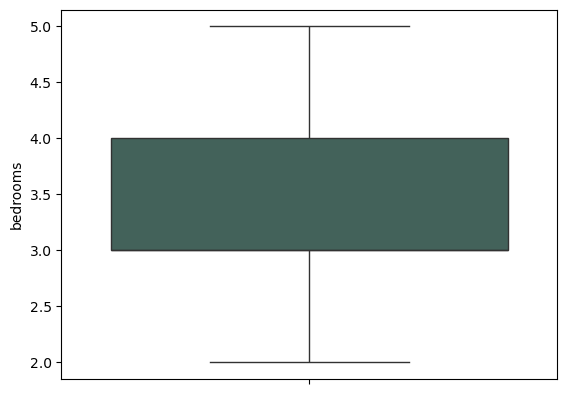

In [35]:
# calculating the iqr for bedroom
q3 = house1['bedrooms'].quantile(0.75)
q1 = house1['bedrooms'].quantile(0.25)

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# removing outlier for bedrooms by filtering
house2 = house1[(house1['bedrooms'] >= lower_bound) & (house1['bedrooms'] <= upper_bound)]
house2

# Plotting the result
sns.boxplot(y=house2['bedrooms'], color='#3e675d');

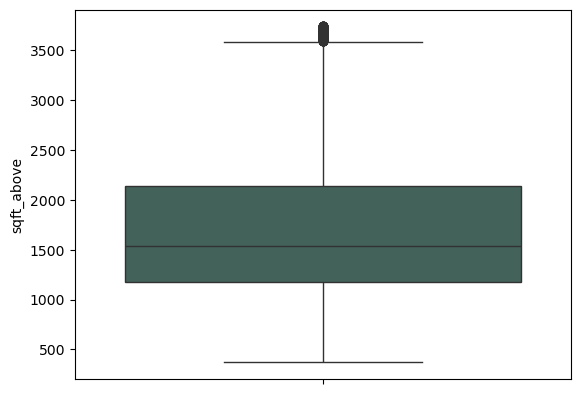

In [36]:
# calculating the iqr for sqft_above
q3 = house1['sqft_above'].quantile(0.75)
q1 = house1['sqft_above'].quantile(0.25)

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# removing outlier for sqft_above by filtering
house3 = house1[(house1['sqft_above'] >= lower_bound) & (house1['sqft_above'] <= upper_bound)]

#plotting the result
sns.boxplot(y=house3['sqft_above'], color='#3e675d');

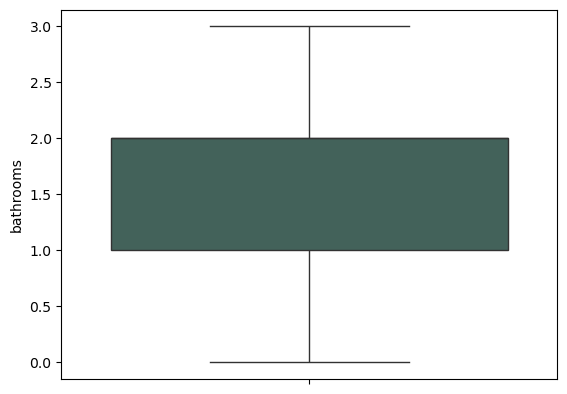

In [37]:
# calculating the iqr for bathrooms
q3 = house1['bathrooms'].quantile(0.75)
q1 = house1['bathrooms'].quantile(0.25)

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# removing outlier for bathrooms by filtering
house4= house1[(house1['bathrooms'] >= lower_bound) & (house1['bathrooms'] <= upper_bound)]

# plotting the result
sns.boxplot(y=house4['bathrooms'], color= '#3e675d');

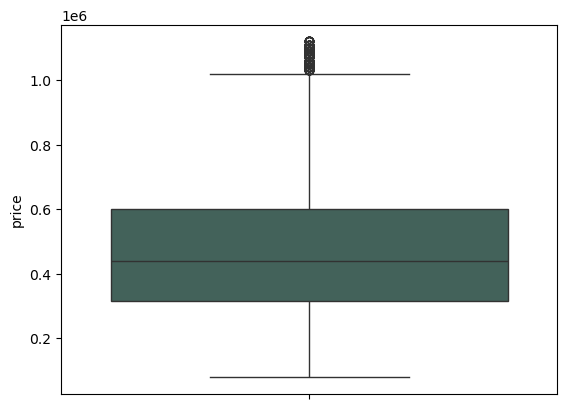

In [38]:
# calculating the iqr for price
q3 = house1['price'].quantile(0.75)
q1 = house1['price'].quantile(0.25)

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# removing outlier for price by filtering
house5= house1[(house1['price'] >= lower_bound) & (house1['price'] <= upper_bound)]

# plotting the result
sns.boxplot(y=house5['price'], color= '#3e675d');

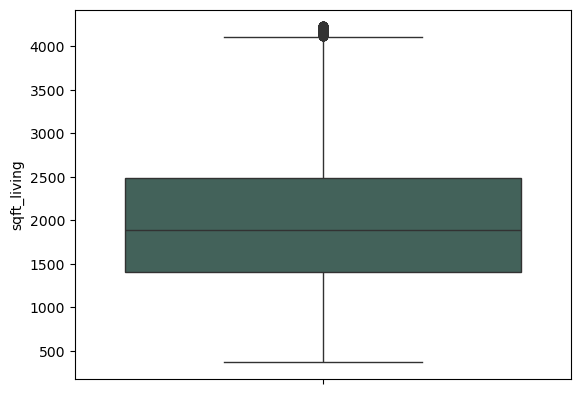

In [39]:
# calculating the iqr for sqft_living
q3 = house1['sqft_living'].quantile(0.75)
q1 = house1['sqft_living'].quantile(0.25)

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# removing outlier for sqft_living by filtering
house6= house1[(house1['sqft_living'] >= lower_bound) & (house1['sqft_living'] <= upper_bound)]

# plotting the result
sns.boxplot(y=house6['sqft_living'], color= '#3e675d');

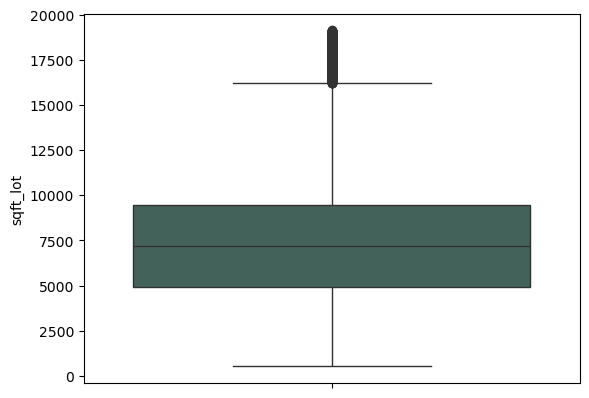

In [40]:
# calculating the iqr for sqft_lot
q3 = house1['sqft_lot'].quantile(0.75)
q1 = house1['sqft_lot'].quantile(0.25)

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# removing outlier for sqft_lot by filtering
house7= house1[(house1['sqft_lot'] >= lower_bound) & (house1['sqft_lot'] <= upper_bound)]

# plotting the result
sns.boxplot(y=house7['sqft_lot'], color= '#3e675d');

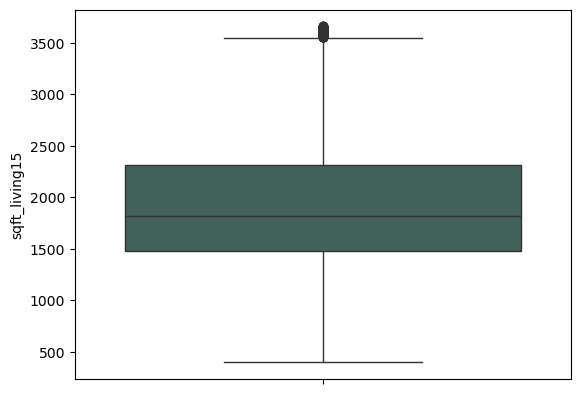

In [41]:
# calculating the iqr for sqft_living15
q3 = house1['sqft_living15'].quantile(0.75)
q1 = house1['sqft_living15'].quantile(0.25)

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# removing outlier for sqft_living15 by filtering
house8= house1[(house1['sqft_living15'] >= lower_bound) & (house1['sqft_living15'] <= upper_bound)]

# plotting the result
sns.boxplot(y=house8['sqft_living15'], color= '#3e675d');

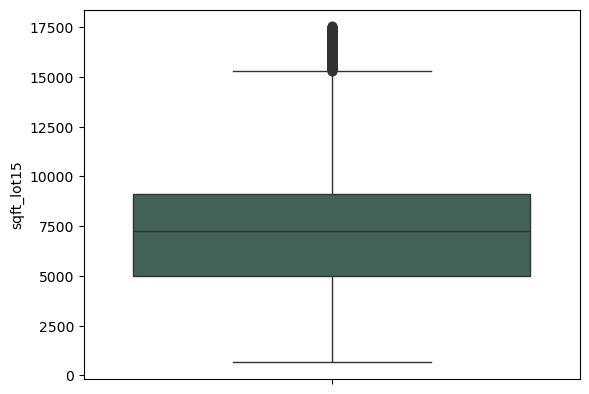

In [42]:
# calculating the iqr for sqft_lot15
q3 = house1['sqft_lot15'].quantile(0.75)
q1 = house1['sqft_lot15'].quantile(0.25)

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# removing outlier for sqft_lot15 by filtering
house9= house1[(house1['sqft_lot15'] >= lower_bound) & (house1['sqft_lot15'] <= upper_bound)]

# plotting the result
sns.boxplot(y=house9['sqft_lot15'], color= '#3e675d');

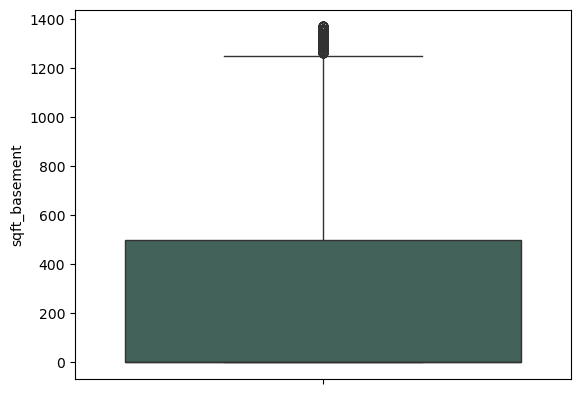

In [43]:
# calculating the iqr for basement
q3 = house1['sqft_basement'].quantile(0.75)
q1 = house1['sqft_basement'].quantile(0.25)

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# removing outlier for basement by filtering
house10= house1[(house1['sqft_basement'] >= lower_bound) & (house1['sqft_basement'] <= upper_bound)]

# plotting the result
sns.boxplot(y=house10['sqft_basement'], color= '#3e675d');

In [44]:
house1.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

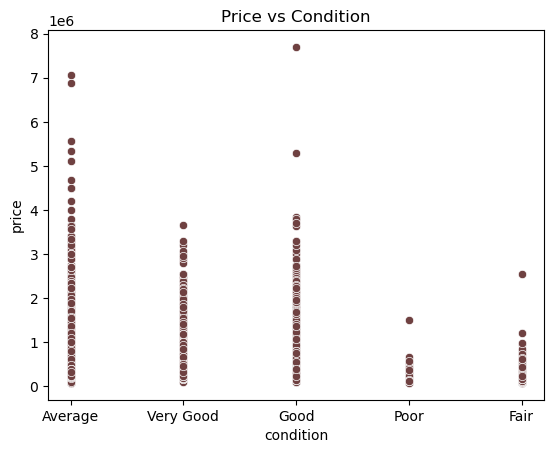

In [45]:
# checking relationship between price and condition
sns.scatterplot(x='condition', y='price', data=house1, color='#6f4141')
plt.title("Price vs Condition");

Observations :  Houses in poor conditions have the lowest range of prices

Observation : Houses in average conditions have their prices fairly distributed

Observation: Houses in very good condition have their prices ranging from 0 to 4

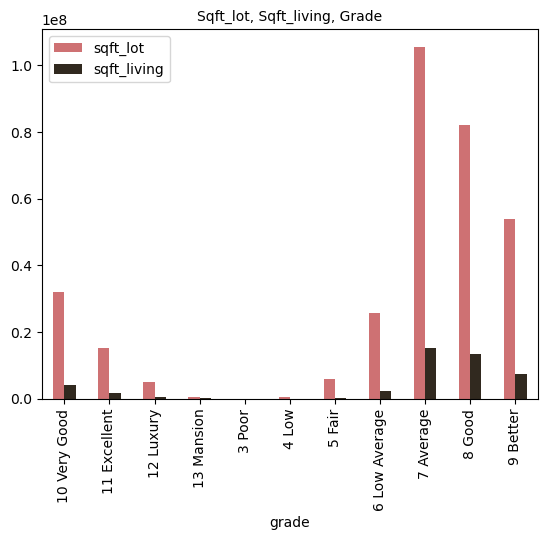

In [46]:
# relationship between
grp4 = house1.groupby(["grade"], observed=False)[["sqft_lot","sqft_living"]].sum()
grp4.plot(kind="bar",color=['#ce7173','#31291f'])
plt.title("Sqft_lot, Sqft_living, Grade",fontsize=10);

Observation: In all grades, sqft_lot is larger than sqft_living. Both Poor and Low grades have their sqft_lot and sqft_living as trace values

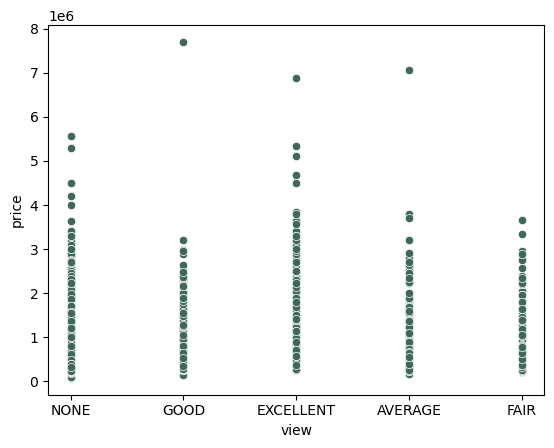

In [51]:
# relationship between view vs price
sns.scatterplot(x='view', y='price', data=house1, color='#3e675d');

Observation: Houses with Good and Excellent views have fairly high prices. Houses with Fair and Average have prices from 0 to 4. Houses  with no view have prices ranging from 0 to 6. 

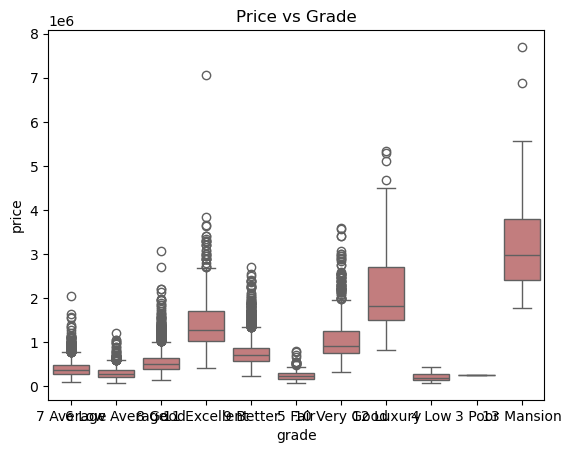

In [48]:
# finding 1  - checking relationship between price and grade
sns.boxplot(y='price', x='grade', data=house1, color="#ce7173")
plt.title("Price vs Grade");

Finding 1 : Poorly defined grading system makes it difficult for visualization to take place, for instance in the visual above, it is difficult to see the grade labels as they are too long making them to overlap each other


Recommendation: Efforts towards improving the grading system needs to be taken so as to create better insights for future analysis and market trends

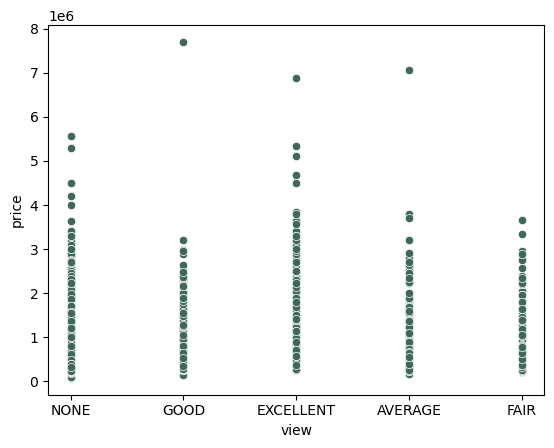

In [52]:
# relationship between view vs price
sns.scatterplot(x='view', y='price', data=house1, color="#3e675d");

Finding 2: In the visual above, although the view has been categorised into Good, Excellent, e.t.c, it is very difficult to spot price variations and how the view can impact the price.  

Recommendation: Efforts to improve classifications such as view and relate the classfication to other variables like price needs to be taken action so as to prove how the view impacts the price

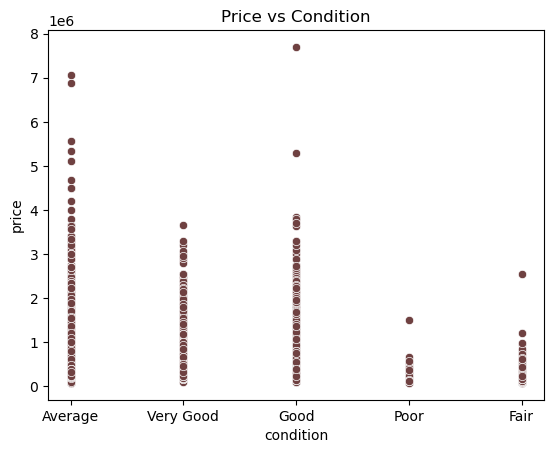

In [53]:
# checking relationship between price and condition
sns.scatterplot(x='condition', y='price', data=house1, color='#6f4141')
plt.title("Price vs Condition");

Finding 3: In the visual above, house conditions has failed to distictively impacted the price as expected.

Recommendation: Condition of houses should distictively  impact the price of the houses, for instance, houses in very good condition should be valued more than averaged houses

In [54]:
# save the cleaned dataset
house1.to_csv("cleaned_data.csv", index=False)  